In [1]:
import pandas as pd
from matplotlib import pyplot as plt

dataset = pd.read_csv("dataset8.csv", index_col="index")
print(dataset)

               date_time  maxtempC  mintempC  totalSnow_cm  sunHour  uvIndex  \
index                                                                          
1       01-01-2009 00:00        27        12             0     11.6        5   
2       01-01-2009 00:00        22         9             0      8.7        4   
3       01-01-2009 00:00        30        22             0     11.0        7   
4       01-01-2009 00:00        31        13             0     11.0        6   
5       01-01-2009 00:00        30        14             0      8.7        5   
...                  ...       ...       ...           ...      ...      ...   
771452  01-01-2020 23:00        29        18             0     11.0        6   
771453  01-01-2020 23:00        24        14             0      7.2        5   
771454  01-01-2020 23:00        26        18             0      4.2        5   
771455  01-01-2020 23:00        19         8             0      8.7        4   
771456  01-01-2020 23:00        15      

In [2]:
dataset.apply(pd.isnull).sum()/dataset.shape[0]

date_time            0.0
maxtempC             0.0
mintempC             0.0
totalSnow_cm         0.0
sunHour              0.0
uvIndex              0.0
uvIndex.1            0.0
moon_illumination    0.0
moonrise             0.0
moonset              0.0
sunrise              0.0
sunset               0.0
DewPointC            0.0
FeelsLikeC           0.0
HeatIndexC           0.0
WindChillC           0.0
WindGustKmph         0.0
cloudcover           0.0
humidity             0.0
precipMM             0.0
pressure             0.0
tempC                0.0
visibility           0.0
winddirDegree        0.0
windspeedKmph        0.0
latitude             0.0
longitude            0.0
dtype: float64

In [3]:
dataset['date_time'] = pd.to_datetime(dataset['date_time'], format='%d-%m-%Y %H:%M')

In [4]:
dataset['time'] = dataset['date_time'].dt.hour

In [5]:
dataset['date_time'] = dataset['date_time'].dt.month

In [6]:
dataset.columns = dataset.columns.str.strip()

In [7]:
mainDataset = dataset[['date_time', 'time', 'latitude', 'longitude', 'tempC', 'FeelsLikeC', 'mintempC', 'maxtempC', 'pressure', 'humidity', 'visibility', 'windspeedKmph', 'winddirDegree', 'WindGustKmph', 'precipMM', 'cloudcover']].copy()

In [8]:
mainDataset.head()

,date_time,time,latitude,longitude,tempC,FeelsLikeC,mintempC,maxtempC,pressure,humidity,visibility,windspeedKmph,winddirDegree,WindGustKmph,precipMM,cloudcover
index,,,,,,,,,,,,,,,,
1,1,0,12.9716,77.5946,14,18,12,27,1014,91,10,8,109,11,0.0,2
2,1,0,28.7041,77.1025,10,14,9,22,1016,50,10,12,331,19,0.0,0
3,1,0,19.0760,72.8777,22,28,22,30,1012,49,10,10,20,11,0.0,0
4,1,0,18.5204,73.8567,13,18,13,31,1013,50,10,3,59,7,0.0,0
5,1,0,21.1458,79.0882,14,17,14,30,1013,48,10,6,15,14,0.0,0


In [9]:
mainDataset["date_time"].value_counts()

date_time
1     65664
3     65472
7     65472
5     65472
12    65472
10    65472
8     65472
4     63360
9     63360
6     63360
11    63360
2     59520
Name: count, dtype: int64

In [10]:
mainDataset["time"].value_counts()

time
0     32144
1     32144
2     32144
3     32144
4     32144
5     32144
6     32144
7     32144
8     32144
9     32144
10    32144
11    32144
12    32144
13    32144
14    32144
15    32144
16    32144
17    32144
18    32144
19    32144
20    32144
21    32144
22    32144
23    32144
Name: count, dtype: int64

In [11]:
mainDataset.columns = ["month", "hour", "latitude", "longitude", "temperature", "feelsLike", "minTemperature", "maxTemperature", "pressure", "humidity", "visibility", "windSpeed", "windDirection", "windGust", "precipitation", "cloudCover"]

In [12]:
mainDataset

,month,hour,latitude,longitude,temperature,feelsLike,minTemperature,maxTemperature,pressure,humidity,visibility,windSpeed,windDirection,windGust,precipitation,cloudCover
index,,,,,,,,,,,,,,,,
1,1,0,12.9716,77.5946,14,18,12,27,1014,91,10,8,109,11,0.0,2
2,1,0,28.7041,77.1025,10,14,9,22,1016,50,10,12,331,19,0.0,0
3,1,0,19.0760,72.8777,22,28,22,30,1012,49,10,10,20,11,0.0,0
4,1,0,18.5204,73.8567,13,18,13,31,1013,50,10,3,59,7,0.0,0
5,1,0,21.1458,79.0882,14,17,14,30,1013,48,10,6,15,14,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771452,1,23,18.5204,73.8567,20,20,18,29,1015,62,10,9,267,16,0.0,2
771453,1,23,21.1458,79.0882,17,17,14,24,1018,84,10,12,95,21,0.0,47
771454,1,23,17.4065,78.4772,20,20,18,26,1016,85,9,17,135,27,0.2,87


In [13]:
mainDataset.dtypes

month               int32
hour                int32
latitude          float64
longitude         float64
temperature         int64
feelsLike           int64
minTemperature      int64
maxTemperature      int64
pressure            int64
humidity            int64
visibility          int64
windSpeed           int64
windDirection       int64
windGust            int64
precipitation     float64
cloudCover          int64
dtype: object

In [14]:
import numpy as np

In [15]:
validationDatasets = np.array_split(mainDataset, 5)

E:\WeatherData\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [16]:
dataset1, dataset2, dataset3, dataset4, dataset5 = validationDatasets

In [17]:
predictors = ["month", "hour", "latitude", "longitude", "minTemperature", "maxTemperature", "pressure", "humidity", "visibility", "windSpeed", "windDirection", "windGust", "precipitation", "cloudCover"]
from sklearn.metrics import mean_absolute_error as mae, root_mean_squared_error as rmse

LINEAR REGRESSION

In [18]:
from sklearn.linear_model import LinearRegression

LinearTrainSet1 = pd.concat([dataset2, dataset3, dataset4, dataset5])
LinearTestSet1 = dataset1

lr1 = LinearRegression()
lr1.fit(LinearTrainSet1[predictors], LinearTrainSet1["temperature"])

LinearPredictions1 = lr1.predict(LinearTestSet1[predictors])

LinearMAE1 = mae(LinearTestSet1["temperature"], LinearPredictions1)
LinearRMSE1 = rmse(LinearTestSet1["temperature"], LinearPredictions1)

LinearOutput1 = pd.concat([LinearTestSet1["temperature"], pd.Series(LinearPredictions1, index=LinearTestSet1.index)], axis=1)
LinearOutput1.columns = ["actual", "predictions"]
LinearOutput1

,actual,predictions
index,,
1,14,13.820889
2,10,12.884611
3,22,25.950931
4,13,18.093757
5,14,16.745500
...,...,...
154288,33,26.542023
154289,32,30.237656
154290,29,22.092254


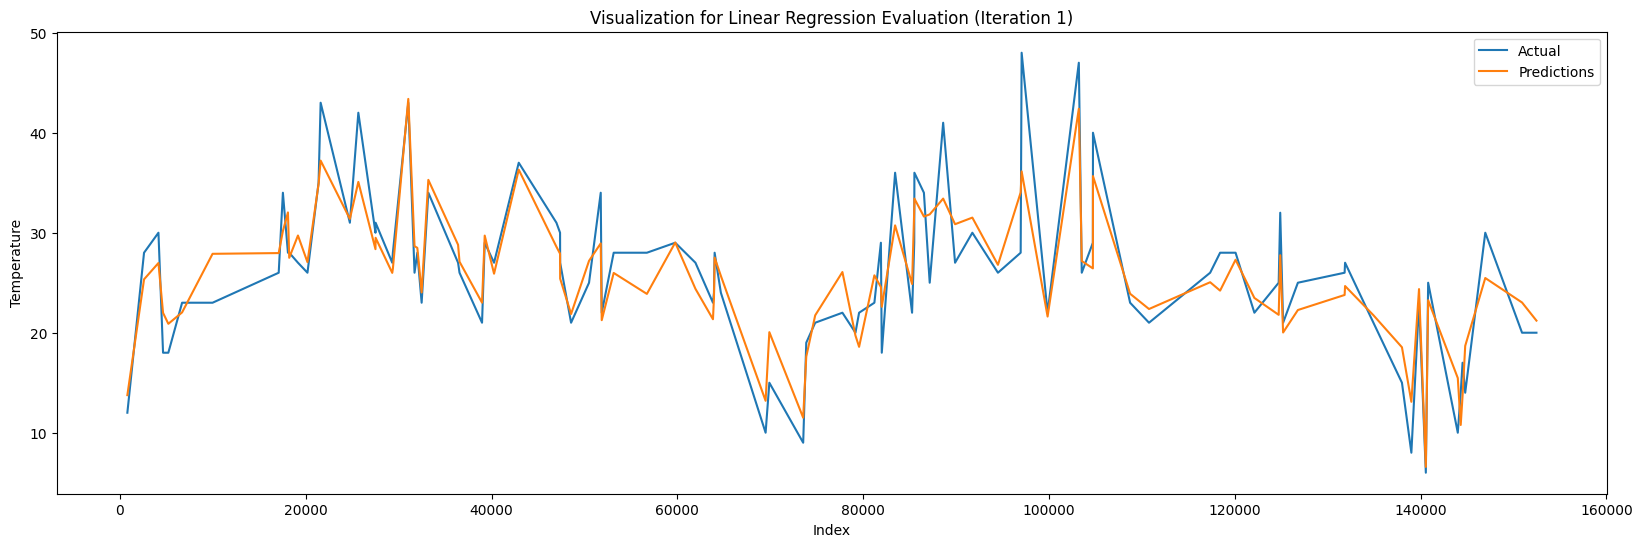

In [19]:
sample = LinearOutput1.sample(n=100)
sample.sort_index(inplace=True)
plt.figure(figsize=(20,6))
plt.plot(sample.index, sample['actual'], label='Actual')
plt.plot(sample.index, sample['predictions'], label='Predictions')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Visualization for Linear Regression Evaluation (Iteration 1)')
plt.legend()
plt.show()

In [20]:
LinearTrainSet2 = pd.concat([dataset1, dataset3, dataset4, dataset5])
LinearTestSet2 = dataset2

lr2 = LinearRegression()
lr2.fit(LinearTrainSet2[predictors], LinearTrainSet2["temperature"])

LinearPredictions2 = lr2.predict(LinearTestSet2[predictors])

LinearMAE2 = mae(LinearTestSet2["temperature"], LinearPredictions2)
LinearRMSE2 = rmse(LinearTestSet2["temperature"], LinearPredictions2)

LinearOutput2 = pd.concat([LinearTestSet2["temperature"], pd.Series(LinearPredictions2, index=LinearTestSet2.index)], axis=1)
LinearOutput2.columns = ["actual", "predictions"]
LinearOutput2

,actual,predictions
index,,
154293,35,32.590122
154294,34,31.669060
154295,33,28.298881
154296,31,26.012819
154297,31,30.430680
...,...,...
308579,29,28.954204
308580,25,25.170089
308581,35,37.580900


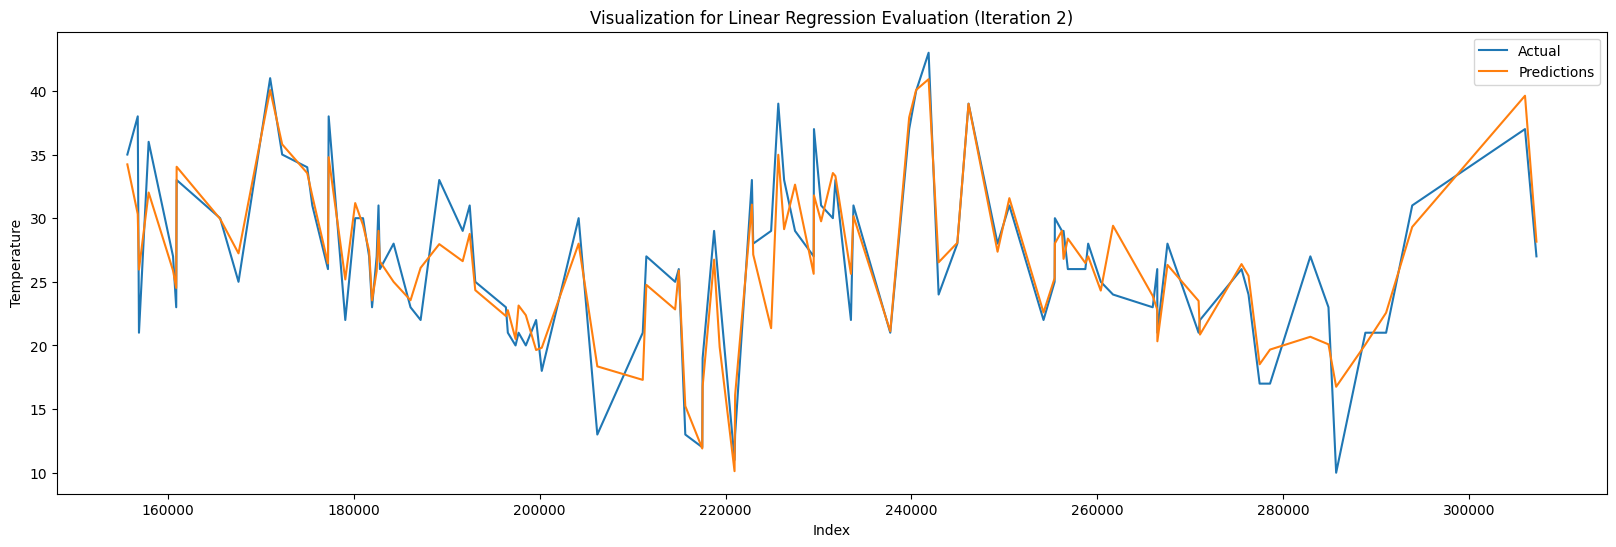

In [21]:
sample = LinearOutput2.sample(n=100)
sample.sort_index(inplace=True)
plt.figure(figsize=(20,6))
plt.plot(sample.index, sample['actual'], label='Actual')
plt.plot(sample.index, sample['predictions'], label='Predictions')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Visualization for Linear Regression Evaluation (Iteration 2)')
plt.legend()
plt.show()

In [22]:
LinearTrainSet3 = pd.concat([dataset1, dataset2, dataset4, dataset5])
LinearTestSet3 = dataset3

lr3 = LinearRegression()
lr3.fit(LinearTrainSet3[predictors], LinearTrainSet3["temperature"])

LinearPredictions3 = lr3.predict(LinearTestSet3[predictors])

LinearMAE3 = mae(LinearTestSet3["temperature"], LinearPredictions3)
LinearRMSE3 = rmse(LinearTestSet3["temperature"], LinearPredictions3)

LinearOutput3 = pd.concat([LinearTestSet3["temperature"], pd.Series(LinearPredictions3, index=LinearTestSet3.index)], axis=1)
LinearOutput3.columns = ["actual", "predictions"]
LinearOutput3

,actual,predictions
index,,
308584,35,37.777402
308585,23,25.012570
308586,35,37.438997
308587,30,29.363572
308588,26,25.864196
...,...,...
462870,27,26.180813
462871,32,32.139236
462872,34,34.484675


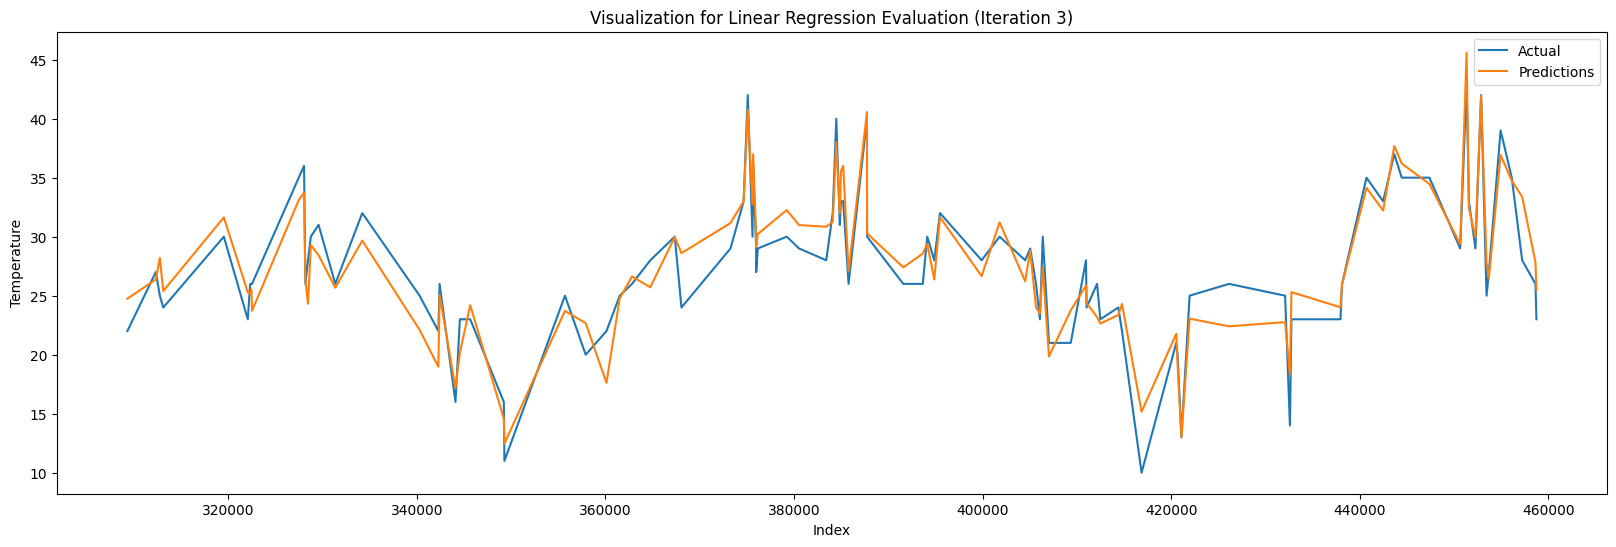

In [23]:
sample = LinearOutput3.sample(n=100)
sample.sort_index(inplace=True)
plt.figure(figsize=(20,6))
plt.plot(sample.index, sample['actual'], label='Actual')
plt.plot(sample.index, sample['predictions'], label='Predictions')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Visualization for Linear Regression Evaluation (Iteration 3)')
plt.legend()
plt.show()

In [24]:
LinearTrainSet4 = pd.concat([dataset1, dataset2, dataset3, dataset5])
LinearTestSet4 = dataset4

lr4 = LinearRegression()
lr4.fit(LinearTrainSet4[predictors], LinearTrainSet4["temperature"])

LinearPredictions4 = lr4.predict(LinearTestSet4[predictors])

LinearMAE4 = mae(LinearTestSet4["temperature"], LinearPredictions4)
LinearRMSE4 = rmse(LinearTestSet4["temperature"], LinearPredictions4)

LinearOutput4 = pd.concat([LinearTestSet4["temperature"], pd.Series(LinearPredictions4, index=LinearTestSet4.index)], axis=1)
LinearOutput4.columns = ["actual", "predictions"]
LinearOutput4

,actual,predictions
index,,
462875,26,26.067662
462876,23,24.157096
462877,27,24.798449
462878,26,26.416146
462879,32,31.617618
...,...,...
617161,28,26.477082
617162,35,31.726025
617163,31,28.782475


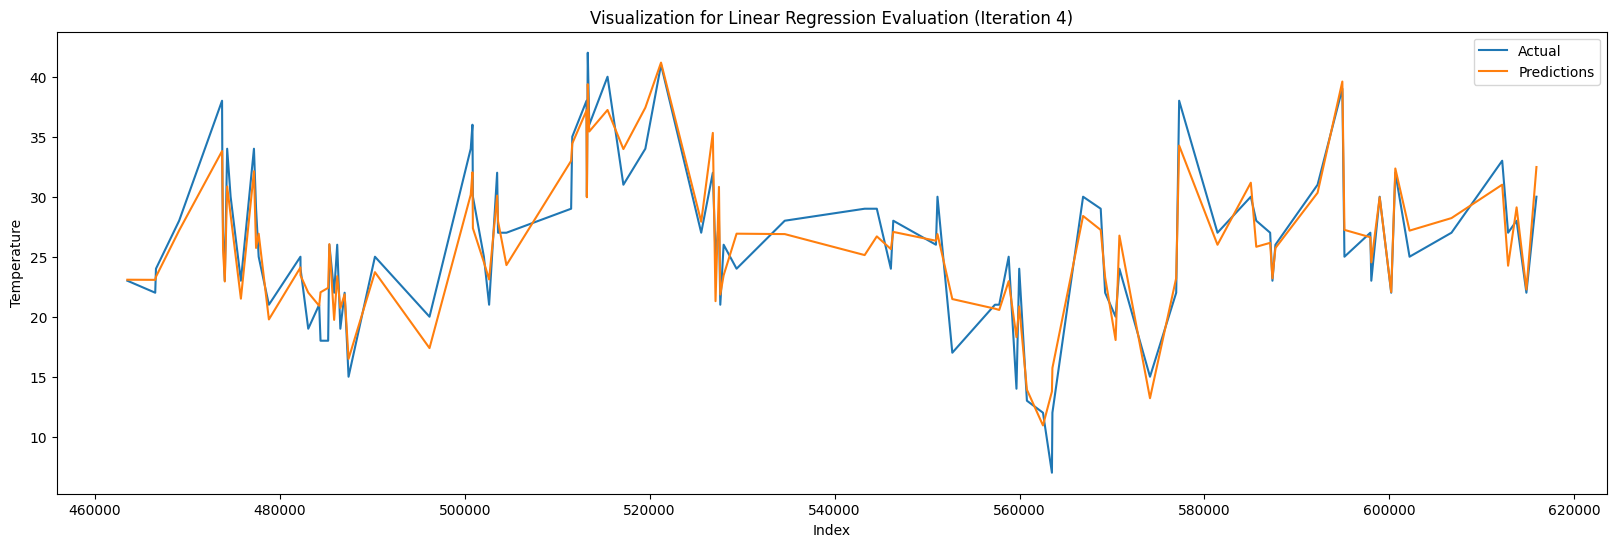

In [25]:
sample = LinearOutput4.sample(n=100)
sample.sort_index(inplace=True)
plt.figure(figsize=(20,6))
plt.plot(sample.index, sample['actual'], label='Actual')
plt.plot(sample.index, sample['predictions'], label='Predictions')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Visualization for Linear Regression Evaluation (Iteration 4)')
plt.legend()
plt.show()

In [26]:
LinearTrainSet5 = pd.concat([dataset1, dataset2, dataset3, dataset4])
LinearTestSet5 = dataset5

lr5 = LinearRegression()
lr5.fit(LinearTrainSet5[predictors], LinearTrainSet5["temperature"])

LinearPredictions5 = lr5.predict(LinearTestSet5[predictors])

LinearMAE5 = mae(LinearTestSet5["temperature"], LinearPredictions5)
LinearRMSE5 = rmse(LinearTestSet5["temperature"], LinearPredictions5)

LinearOutput5 = pd.concat([LinearTestSet5["temperature"], pd.Series(LinearPredictions5, index=LinearTestSet5.index)], axis=1)
LinearOutput5.columns = ["actual", "predictions"]
LinearOutput5

,actual,predictions
index,,
617166,30,30.548909
617167,34,31.859732
617168,30,29.429317
617169,28,26.844042
617170,35,32.427351
...,...,...
771452,20,20.937372
771453,17,14.588012
771454,20,19.205650


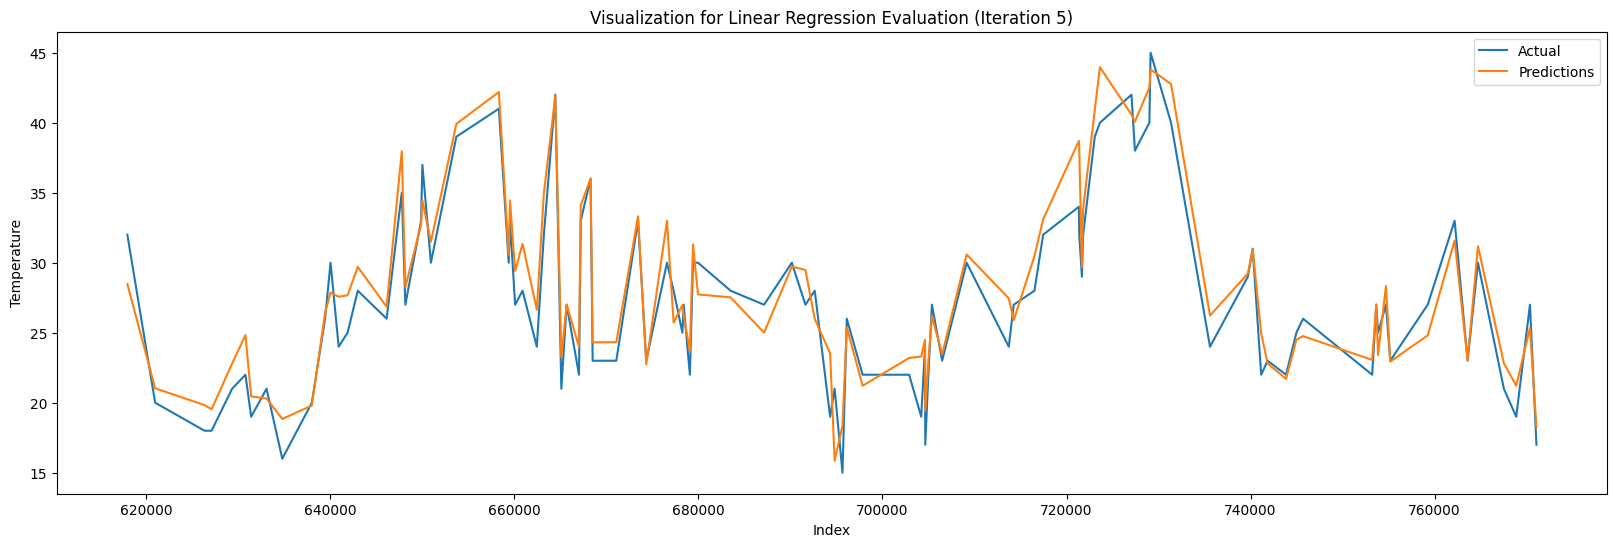

In [27]:
sample = LinearOutput5.sample(n=100)
sample.sort_index(inplace=True)
plt.figure(figsize=(20,6))
plt.plot(sample.index, sample['actual'], label='Actual')
plt.plot(sample.index, sample['predictions'], label='Predictions')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Visualization for Linear Regression Evaluation (Iteration 5)')
plt.legend()
plt.show()

RANDOM FOREST REGRESSION

In [28]:
from sklearn.ensemble import RandomForestRegressor

RandomForestTrainSet1 = pd.concat([dataset2, dataset3, dataset4, dataset5])
RandomForestTestSet1 = dataset1

rfr1 = RandomForestRegressor()
rfr1.fit(RandomForestTrainSet1[predictors], RandomForestTrainSet1["temperature"])

RandomForestPredictions1 = rfr1.predict(RandomForestTestSet1[predictors])

RandomForestMAE1 = mae(RandomForestTestSet1["temperature"], RandomForestPredictions1)
RandomForestRMSE1 = rmse(RandomForestTestSet1["temperature"], RandomForestPredictions1)

RandomForestOutput1 = pd.concat([RandomForestTestSet1["temperature"], pd.Series(RandomForestPredictions1, index=RandomForestTestSet1.index)], axis=1)
RandomForestOutput1.columns = ["actual", "predictions"]
RandomForestOutput1

,actual,predictions
index,,
1,14,13.71
2,10,10.40
3,22,22.81
4,13,14.26
5,14,15.66
...,...,...
154288,33,32.48
154289,32,32.32
154290,29,29.55


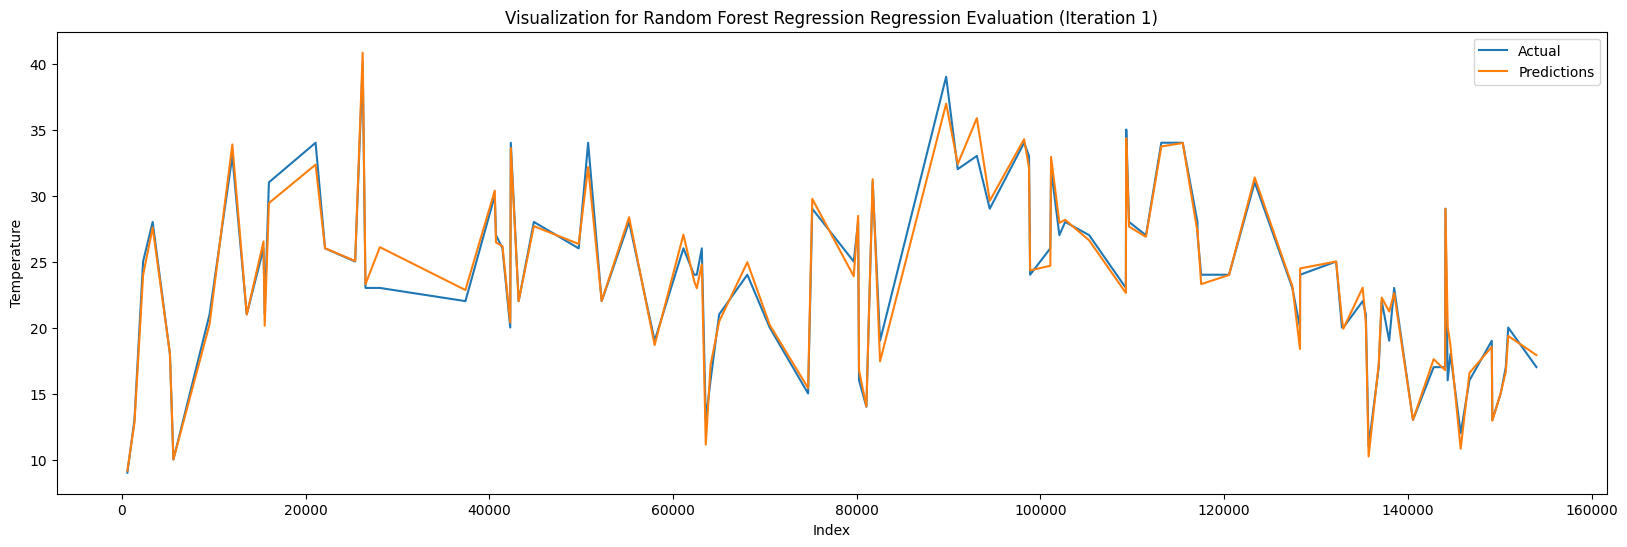

In [29]:
sample = RandomForestOutput1.sample(n=100)
sample.sort_index(inplace=True)
plt.figure(figsize=(20,6))
plt.plot(sample.index, sample['actual'], label='Actual')
plt.plot(sample.index, sample['predictions'], label='Predictions')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Visualization for Random Forest Regression Regression Evaluation (Iteration 1)')
plt.legend()
plt.show()

In [30]:
RandomForestTrainSet2 = pd.concat([dataset1, dataset3, dataset4, dataset5])
RandomForestTestSet2 = dataset2

rfr2 = RandomForestRegressor()
rfr2.fit(RandomForestTrainSet2[predictors], RandomForestTrainSet2["temperature"])

RandomForestPredictions2 = rfr2.predict(RandomForestTestSet2[predictors])

RandomForestMAE2 = mae(RandomForestTestSet2["temperature"], RandomForestPredictions2)
RandomForestRMSE2 = rmse(RandomForestTestSet2["temperature"], RandomForestPredictions2)

RandomForestOutput2 = pd.concat([RandomForestTestSet2["temperature"], pd.Series(RandomForestPredictions2, index=RandomForestTestSet2.index)], axis=1)
RandomForestOutput2.columns = ["actual", "predictions"]
RandomForestOutput2

,actual,predictions
index,,
154293,35,35.88
154294,34,33.12
154295,33,33.31
154296,31,30.32
154297,31,31.34
...,...,...
308579,29,29.14
308580,25,24.38
308581,35,35.11


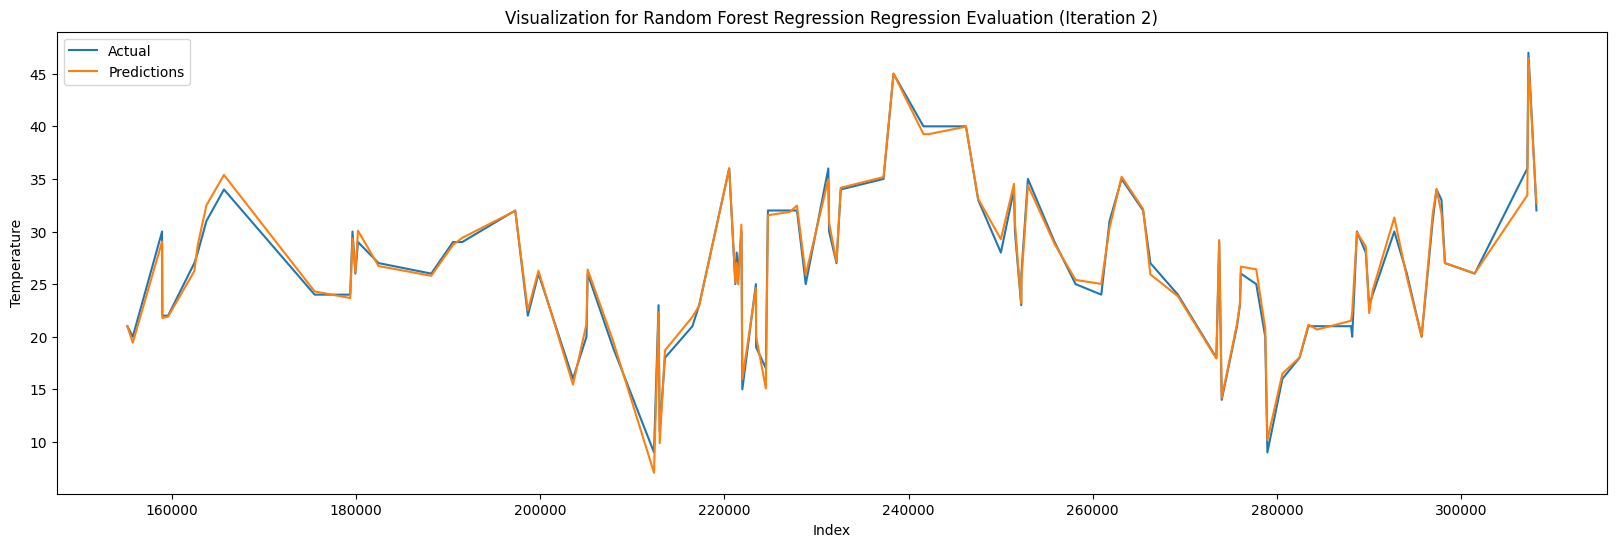

In [31]:
sample = RandomForestOutput2.sample(n=100)
sample.sort_index(inplace=True)
plt.figure(figsize=(20,6))
plt.plot(sample.index, sample['actual'], label='Actual')
plt.plot(sample.index, sample['predictions'], label='Predictions')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Visualization for Random Forest Regression Regression Evaluation (Iteration 2)')
plt.legend()
plt.show()

In [32]:
RandomForestTrainSet3 = pd.concat([dataset1, dataset2, dataset4, dataset5])
RandomForestTestSet3 = dataset3

rfr3 = RandomForestRegressor()
rfr3.fit(RandomForestTrainSet3[predictors], RandomForestTrainSet3["temperature"])

RandomForestPredictions3 = rfr3.predict(RandomForestTestSet3[predictors])

RandomForestMAE3 = mae(RandomForestTestSet3["temperature"], RandomForestPredictions3)
RandomForestRMSE3 = rmse(RandomForestTestSet3["temperature"], RandomForestPredictions3)

RandomForestOutput3 = pd.concat([RandomForestTestSet3["temperature"], pd.Series(RandomForestPredictions3, index=RandomForestTestSet3.index)], axis=1)
RandomForestOutput3.columns = ["actual", "predictions"]
RandomForestOutput3

,actual,predictions
index,,
308584,35,34.91
308585,23,23.91
308586,35,34.81
308587,30,29.95
308588,26,25.67
...,...,...
462870,27,25.88
462871,32,31.55
462872,34,34.42


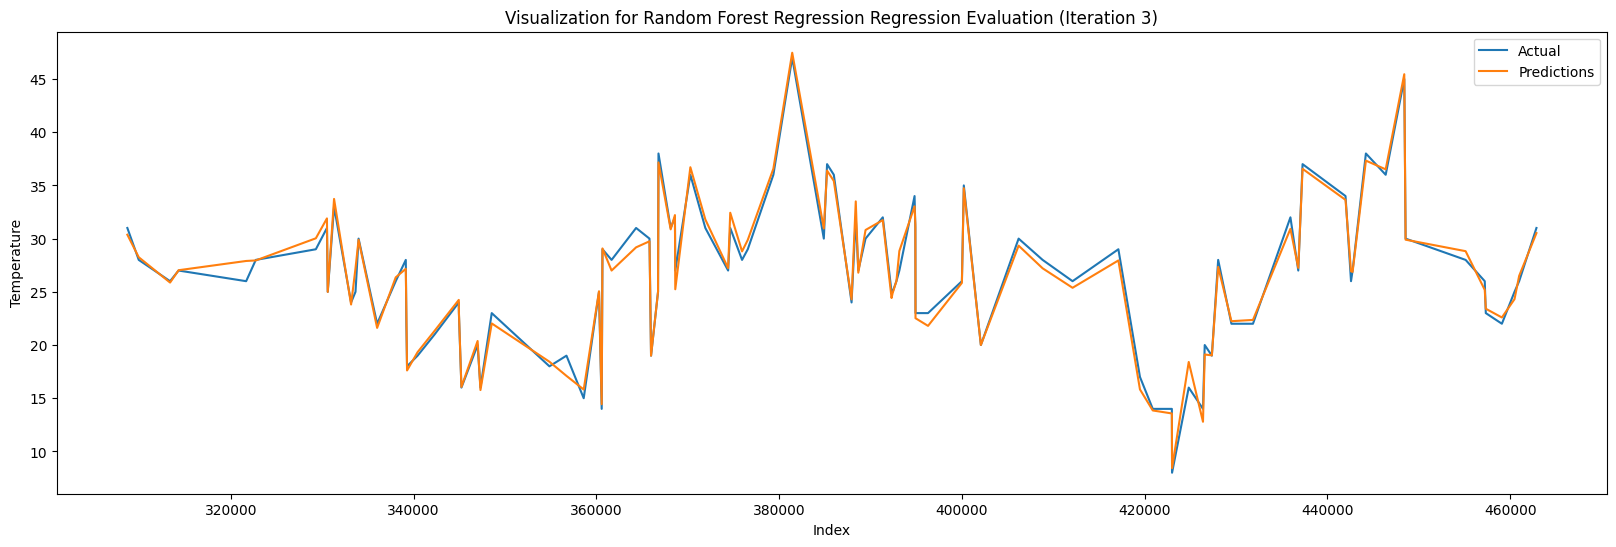

In [33]:
sample = RandomForestOutput3.sample(n=100)
sample.sort_index(inplace=True)
plt.figure(figsize=(20,6))
plt.plot(sample.index, sample['actual'], label='Actual')
plt.plot(sample.index, sample['predictions'], label='Predictions')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Visualization for Random Forest Regression Regression Evaluation (Iteration 3)')
plt.legend()
plt.show()

In [34]:
RandomForestTrainSet4 = pd.concat([dataset1, dataset2, dataset3, dataset5])
RandomForestTestSet4 = dataset4

rfr4 = RandomForestRegressor()
rfr4.fit(RandomForestTrainSet4[predictors], RandomForestTrainSet4["temperature"])

RandomForestPredictions4 = rfr4.predict(RandomForestTestSet4[predictors])

RandomForestMAE4 = mae(RandomForestTestSet4["temperature"], RandomForestPredictions4)
RandomForestRMSE4 = rmse(RandomForestTestSet4["temperature"], RandomForestPredictions4)

RandomForestOutput4 = pd.concat([RandomForestTestSet4["temperature"], pd.Series(RandomForestPredictions4, index=RandomForestTestSet4.index)], axis=1)
RandomForestOutput4.columns = ["actual", "predictions"]
RandomForestOutput4

,actual,predictions
index,,
462875,26,26.03
462876,23,22.45
462877,27,26.86
462878,26,26.30
462879,32,30.76
...,...,...
617161,28,27.35
617162,35,33.95
617163,31,31.26


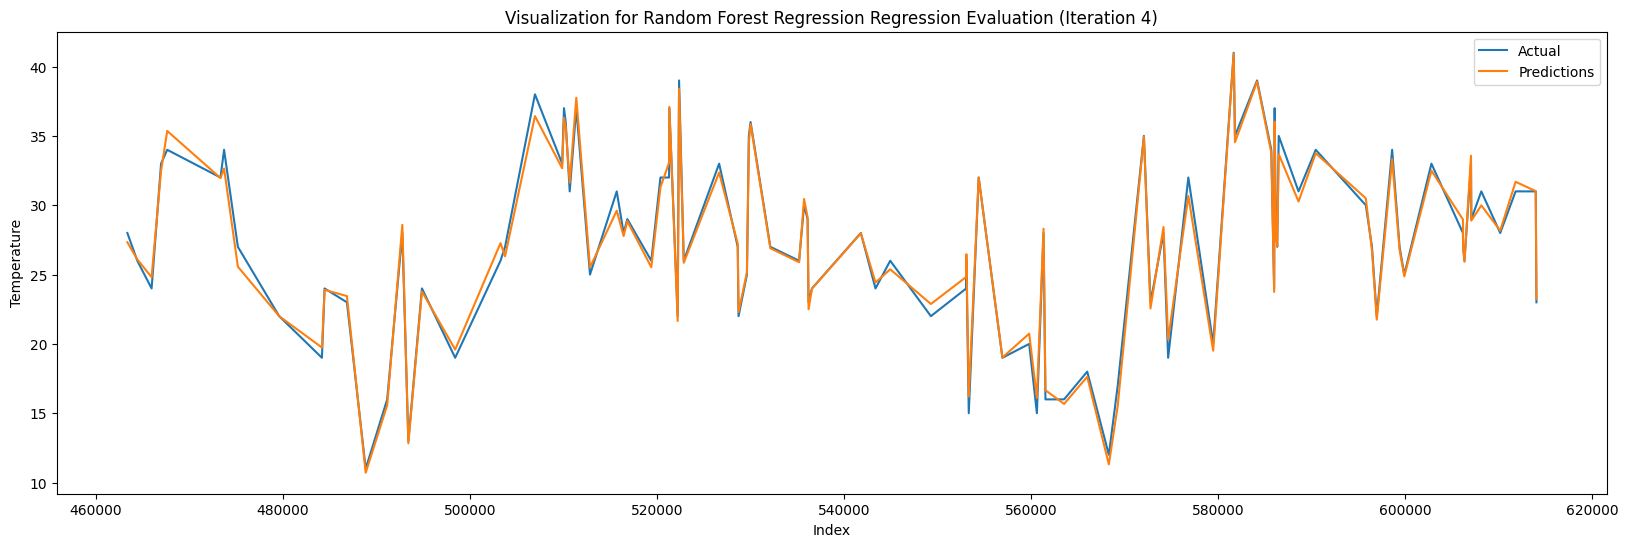

In [35]:
sample = RandomForestOutput4.sample(n=100)
sample.sort_index(inplace=True)
plt.figure(figsize=(20,6))
plt.plot(sample.index, sample['actual'], label='Actual')
plt.plot(sample.index, sample['predictions'], label='Predictions')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Visualization for Random Forest Regression Regression Evaluation (Iteration 4)')
plt.legend()
plt.show()

In [36]:
RandomForestTrainSet5 = pd.concat([dataset1, dataset2, dataset3, dataset4])
RandomForestTestSet5 = dataset5

rfr5 = RandomForestRegressor()
rfr5.fit(RandomForestTrainSet5[predictors], RandomForestTrainSet5["temperature"])

RandomForestPredictions5 = rfr5.predict(RandomForestTestSet5[predictors])

RandomForestMAE5 = mae(RandomForestTestSet5["temperature"], RandomForestPredictions5)
RandomForestRMSE5 = rmse(RandomForestTestSet5["temperature"], RandomForestPredictions5)

RandomForestOutput5 = pd.concat([RandomForestTestSet5["temperature"], pd.Series(RandomForestPredictions5, index=RandomForestTestSet5.index)], axis=1)
RandomForestOutput5.columns = ["actual", "predictions"]
RandomForestOutput5

,actual,predictions
index,,
617166,30,30.71
617167,34,34.97
617168,30,31.83
617169,28,27.43
617170,35,34.61
...,...,...
771452,20,18.97
771453,17,14.36
771454,20,18.51


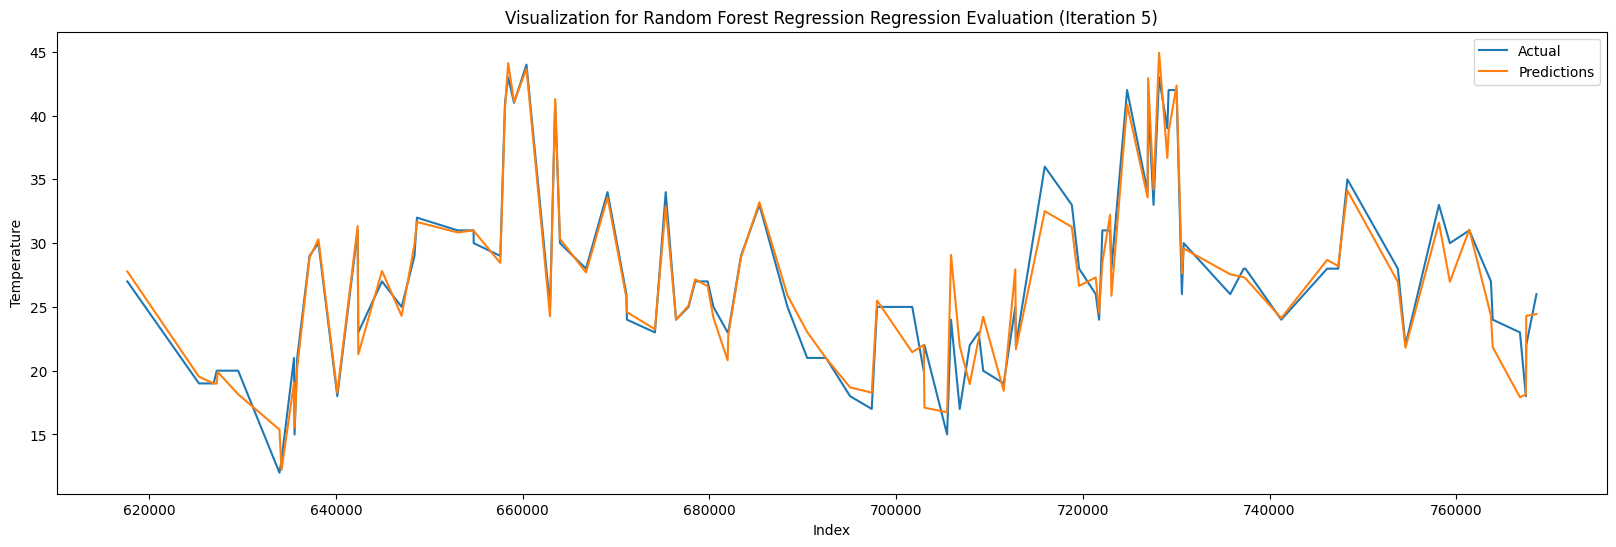

In [37]:
sample = RandomForestOutput5.sample(n=100)
sample.sort_index(inplace=True)
plt.figure(figsize=(20,6))
plt.plot(sample.index, sample['actual'], label='Actual')
plt.plot(sample.index, sample['predictions'], label='Predictions')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Visualization for Random Forest Regression Regression Evaluation (Iteration 5)')
plt.legend()
plt.show()

Support Vector Regression

In [38]:
from sklearn.svm import LinearSVR

SupportVectorTrainSet1 = pd.concat([dataset2, dataset3, dataset4, dataset5])
SupportVectorTestSet1 = dataset1

svr1 = LinearSVR()
svr1.fit(SupportVectorTrainSet1[predictors], SupportVectorTrainSet1["temperature"])

SupportVectorPredictions1 = svr1.predict(SupportVectorTestSet1[predictors])

SupportVectorMAE1 = mae(SupportVectorTestSet1["temperature"], SupportVectorPredictions1)
SupportVectorRMSE1 = rmse(SupportVectorTestSet1["temperature"], SupportVectorPredictions1)

SupportVectorOutput1 = pd.concat([SupportVectorTestSet1["temperature"], pd.Series(SupportVectorPredictions1, index=SupportVectorTestSet1.index)], axis=1)
SupportVectorOutput1.columns = ["actual", "predictions"]
SupportVectorOutput1

E:\WeatherData\.venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,actual,predictions
index,,
1,14,12.612849
2,10,12.178257
3,22,24.659589
4,13,16.336739
5,14,15.429529
...,...,...
154288,33,25.384004
154289,32,27.846567
154290,29,21.105984


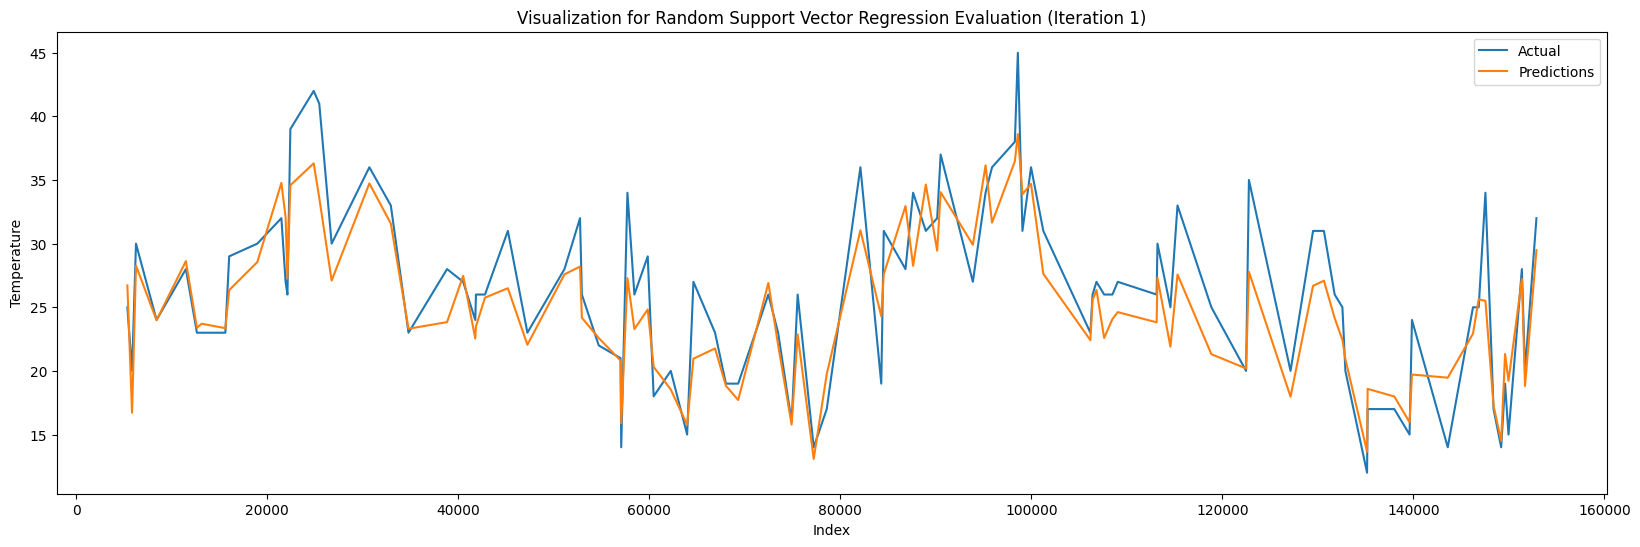

In [39]:
sample = SupportVectorOutput1.sample(n=100)
sample.sort_index(inplace=True)
plt.figure(figsize=(20,6))
plt.plot(sample.index, sample['actual'], label='Actual')
plt.plot(sample.index, sample['predictions'], label='Predictions')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Visualization for Random Support Vector Regression Evaluation (Iteration 1)')
plt.legend()
plt.show()

In [40]:
SupportVectorTrainSet2 = pd.concat([dataset1, dataset3, dataset4, dataset5])
SupportVectorTestSet2 = dataset2

svr2 = LinearSVR()
svr2.fit(SupportVectorTrainSet2[predictors], SupportVectorTrainSet2["temperature"])

SupportVectorPredictions2 = svr2.predict(SupportVectorTestSet2[predictors])

SupportVectorMAE2 = mae(SupportVectorTestSet2["temperature"], SupportVectorPredictions2)
SupportVectorRMSE2 = rmse(SupportVectorTestSet2["temperature"], SupportVectorPredictions2)

SupportVectorOutput2 = pd.concat([SupportVectorTestSet2["temperature"], pd.Series(SupportVectorPredictions2, index=SupportVectorTestSet2.index)], axis=1)
SupportVectorOutput2.columns = ["actual", "predictions"]
SupportVectorOutput2

E:\WeatherData\.venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,actual,predictions
index,,
154293,35,31.444274
154294,34,29.753824
154295,33,27.246499
154296,31,24.766500
154297,31,28.097357
...,...,...
308579,29,28.461529
308580,25,24.892615
308581,35,36.816412


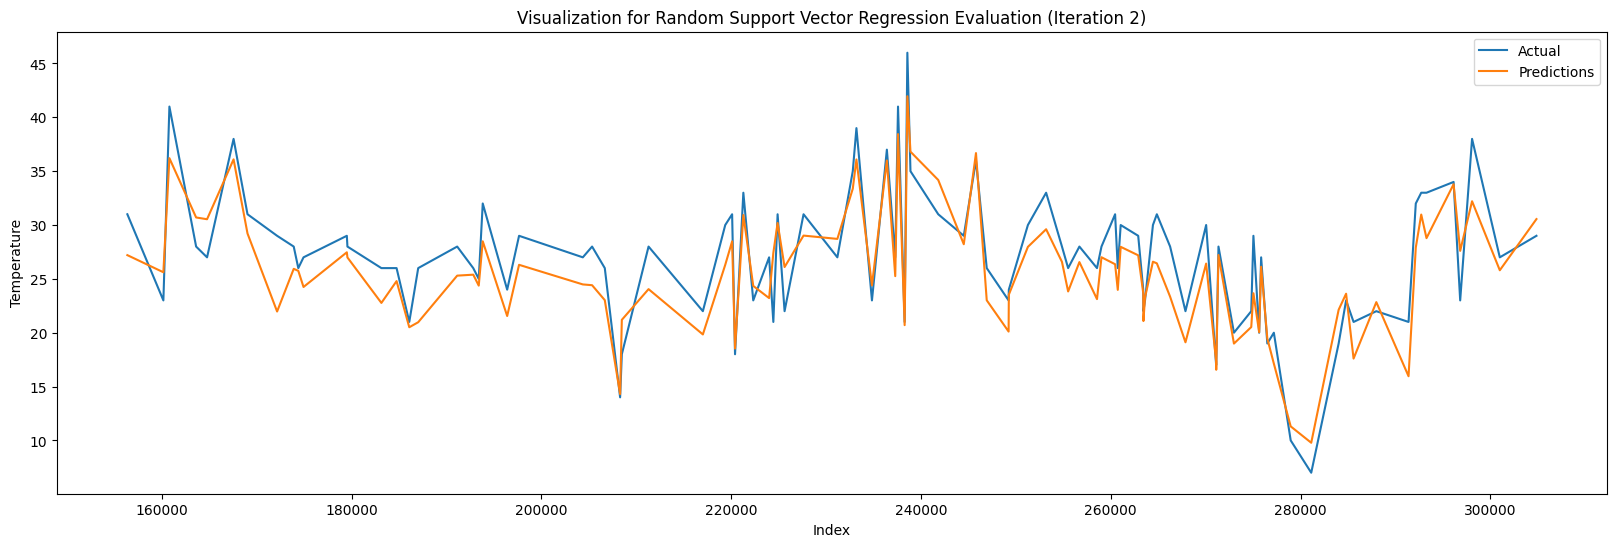

In [41]:
sample = SupportVectorOutput2.sample(n=100)
sample.sort_index(inplace=True)
plt.figure(figsize=(20,6))
plt.plot(sample.index, sample['actual'], label='Actual')
plt.plot(sample.index, sample['predictions'], label='Predictions')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Visualization for Random Support Vector Regression Evaluation (Iteration 2)')
plt.legend()
plt.show()

In [42]:
SupportVectorTrainSet3 = pd.concat([dataset1, dataset2, dataset4, dataset5])
SupportVectorTestSet3 = dataset3

svr3 = LinearSVR()
svr3.fit(SupportVectorTrainSet3[predictors], SupportVectorTrainSet3["temperature"])

SupportVectorPredictions3 = svr3.predict(SupportVectorTestSet3[predictors])

SupportVectorMAE3 = mae(SupportVectorTestSet3["temperature"], SupportVectorPredictions3)
SupportVectorRMSE3 = rmse(SupportVectorTestSet3["temperature"], SupportVectorPredictions3)

SupportVectorOutput3 = pd.concat([SupportVectorTestSet3["temperature"], pd.Series(SupportVectorPredictions3, index=SupportVectorTestSet3.index)], axis=1)
SupportVectorOutput3.columns = ["actual", "predictions"]
SupportVectorOutput3

E:\WeatherData\.venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,actual,predictions
index,,
308584,35,39.171239
308585,23,27.070230
308586,35,39.001821
308587,30,31.375653
308588,26,27.770827
...,...,...
462870,27,27.002384
462871,32,33.525723
462872,34,35.457251


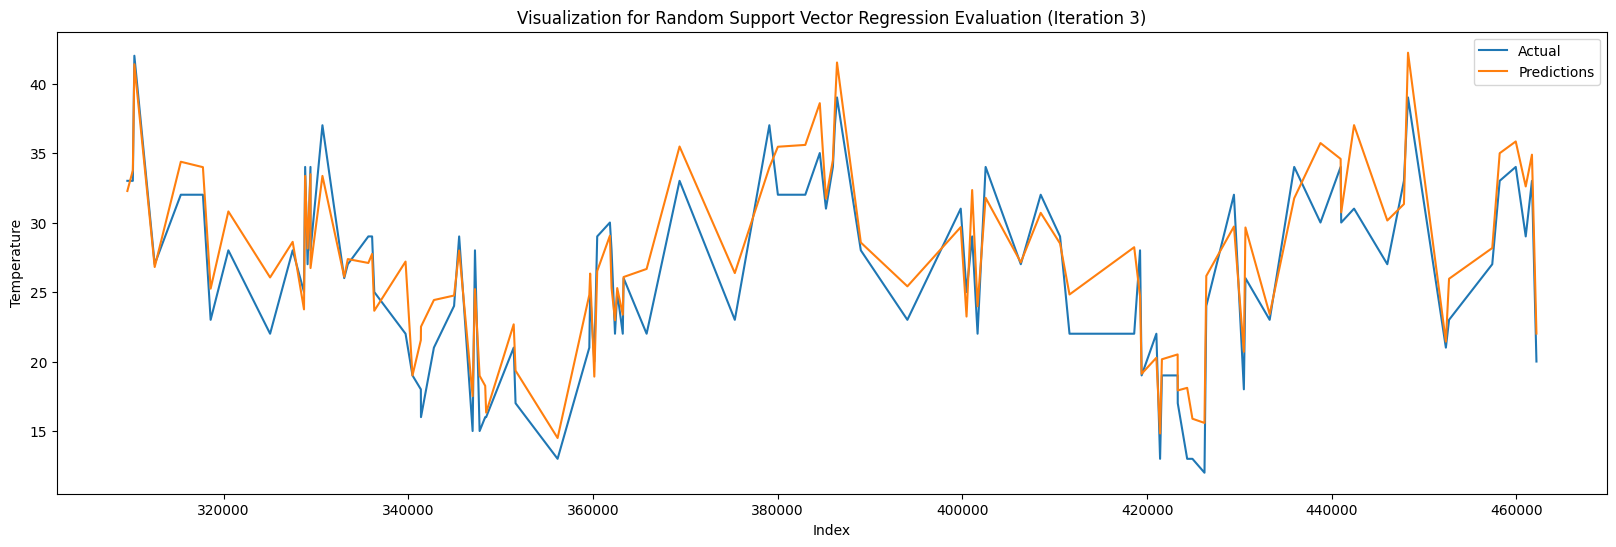

In [43]:
sample = SupportVectorOutput3.sample(n=100)
sample.sort_index(inplace=True)
plt.figure(figsize=(20,6))
plt.plot(sample.index, sample['actual'], label='Actual')
plt.plot(sample.index, sample['predictions'], label='Predictions')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Visualization for Random Support Vector Regression Evaluation (Iteration 3)')
plt.legend()
plt.show()

In [44]:
SupportVectorTrainSet4 = pd.concat([dataset1, dataset2, dataset3, dataset5])
SupportVectorTestSet4 = dataset4

svr4 = LinearSVR()
svr4.fit(SupportVectorTrainSet4[predictors], SupportVectorTrainSet4["temperature"])

SupportVectorPredictions4 = svr1.predict(SupportVectorTestSet4[predictors])

SupportVectorMAE4 = mae(SupportVectorTestSet4["temperature"], SupportVectorPredictions4)
SupportVectorRMSE4 = rmse(SupportVectorTestSet4["temperature"], SupportVectorPredictions4)

SupportVectorOutput4 = pd.concat([SupportVectorTestSet4["temperature"], pd.Series(SupportVectorPredictions4, index=SupportVectorTestSet4.index)], axis=1)
SupportVectorOutput4.columns = ["actual", "predictions"]
SupportVectorOutput4

E:\WeatherData\.venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,actual,predictions
index,,
462875,26,25.616869
462876,23,23.746787
462877,27,23.837830
462878,26,25.477380
462879,32,30.963932
...,...,...
617161,28,25.813066
617162,35,31.225111
617163,31,27.898175


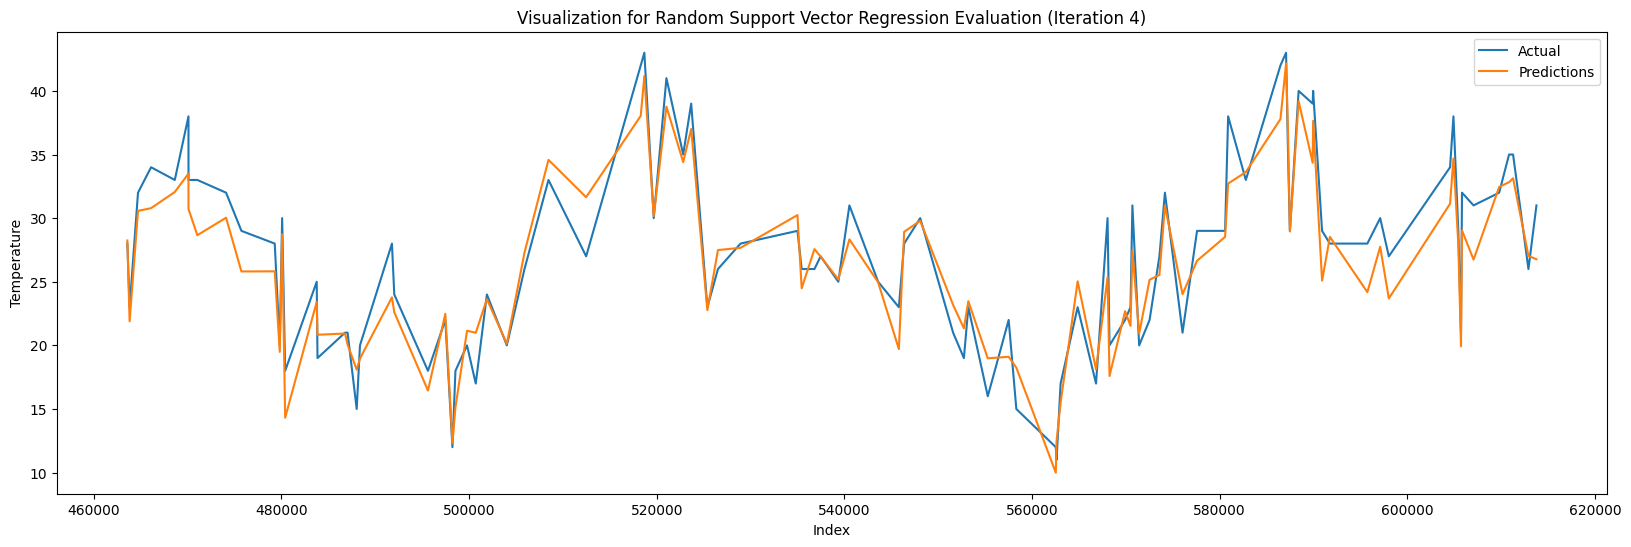

In [45]:
sample = SupportVectorOutput4.sample(n=100)
sample.sort_index(inplace=True)
plt.figure(figsize=(20,6))
plt.plot(sample.index, sample['actual'], label='Actual')
plt.plot(sample.index, sample['predictions'], label='Predictions')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Visualization for Random Support Vector Regression Evaluation (Iteration 4)')
plt.legend()
plt.show()

In [46]:
SupportVectorTrainSet5 = pd.concat([dataset1, dataset2, dataset3, dataset4])
SupportVectorTestSet5 = dataset5

svr5 = LinearSVR()
svr5.fit(SupportVectorTrainSet5[predictors], SupportVectorTrainSet5["temperature"])

SupportVectorPredictions5 = svr5.predict(SupportVectorTestSet5[predictors])

SupportVectorMAE5 = mae(SupportVectorTestSet5["temperature"], SupportVectorPredictions5)
SupportVectorRMSE5 = rmse(SupportVectorTestSet5["temperature"], SupportVectorPredictions5)

SupportVectorOutput5 = pd.concat([SupportVectorTestSet5["temperature"], pd.Series(SupportVectorPredictions5, index=SupportVectorTestSet5.index)], axis=1)
SupportVectorOutput5.columns = ["actual", "predictions"]
SupportVectorOutput5

E:\WeatherData\.venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,actual,predictions
index,,
617166,30,30.671681
617167,34,32.319949
617168,30,30.220353
617169,28,26.967641
617170,35,32.973104
...,...,...
771452,20,21.272169
771453,17,15.928783
771454,20,20.941129


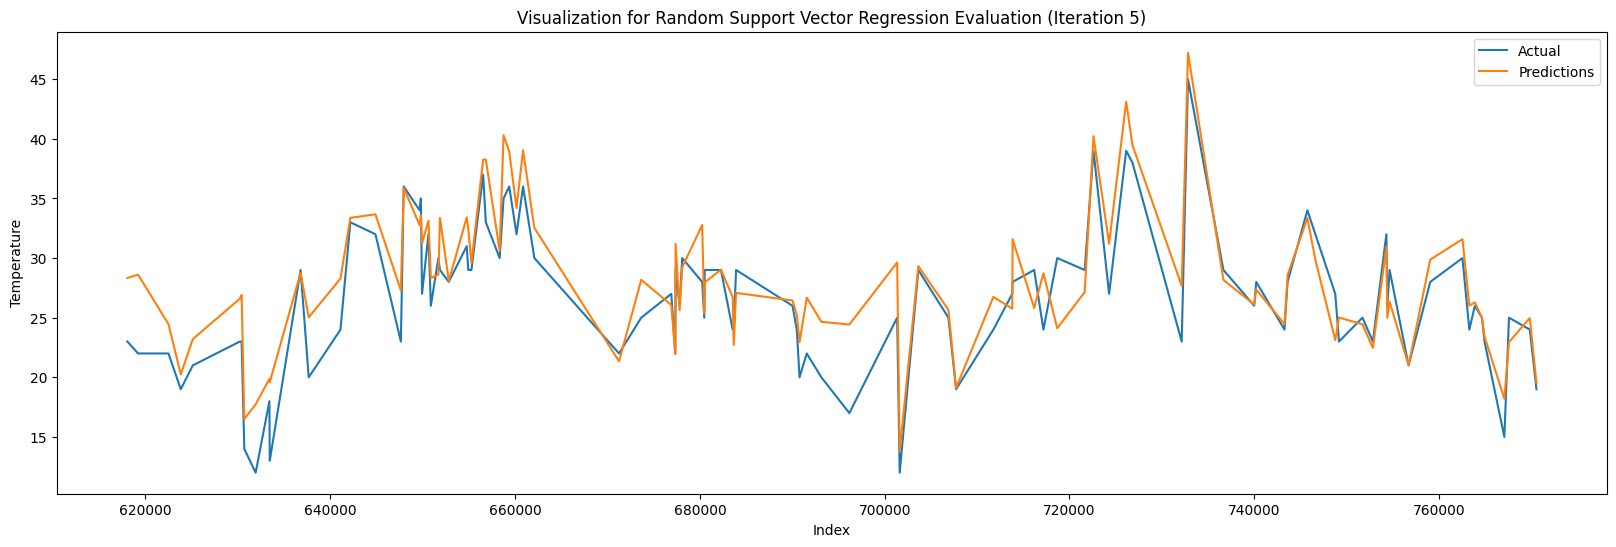

In [47]:
sample = SupportVectorOutput5.sample(n=100)
sample.sort_index(inplace=True)
plt.figure(figsize=(20,6))
plt.plot(sample.index, sample['actual'], label='Actual')
plt.plot(sample.index, sample['predictions'], label='Predictions')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Visualization for Random Support Vector Regression Evaluation (Iteration 5)')
plt.legend()
plt.show()

ACCURACY METRICS

In [48]:
print("Average Mean Squared error of Linear Regression: " + str((LinearMAE1+LinearMAE2+LinearMAE3+LinearMAE4+LinearMAE5)/5))
print("Average Root Mean Squared error of Linear Regression: " + str((LinearRMSE1+LinearRMSE2+LinearRMSE3+LinearRMSE4+LinearRMSE5)/5))
print()

print("Average Mean Squared error of Random Forest Regression: " + str((RandomForestMAE1+RandomForestMAE2+RandomForestMAE3+RandomForestMAE4+RandomForestMAE5)/5))
print("Average Root Mean Squared error of Random Forest Regression: " + str((RandomForestRMSE1+RandomForestRMSE2+RandomForestRMSE3+RandomForestRMSE4+RandomForestRMSE5)/5))
print()

print("Average Mean Squared error of Support Vector Regression: " + str((SupportVectorMAE1+SupportVectorMAE2+SupportVectorMAE3+SupportVectorMAE4+SupportVectorMAE5)/5))
print("Average Root Mean Squared error of Support Vector Regression: " + str((SupportVectorRMSE1+SupportVectorRMSE2+SupportVectorRMSE3+SupportVectorRMSE4+SupportVectorRMSE5)/5))

Average Mean Squared error of Linear Regression: 1.915021674078948
Average Root Mean Squared error of Linear Regression: 2.4406744333534443

Average Mean Squared error of Random Forest Regression: 0.7082506453318952
Average Root Mean Squared error of Random Forest Regression: 1.034718104038519

Average Mean Squared error of Support Vector Regression: 2.1857587897095505
Average Root Mean Squared error of Support Vector Regression: 2.7528153130793784


FINAL MODEL TRAINING

In [49]:
perm = np.random.permutation(mainDataset.index)
m = len(mainDataset) * 80 // 100
finalTrainDataset = mainDataset.loc[perm[:m]]
finalTestDataset = mainDataset.loc[perm[m:]]

temperatureRFR = RandomForestRegressor()
temperatureRFR.fit(finalTrainDataset[predictors], finalTrainDataset["temperature"])
finalTemperaturePredictions = temperatureRFR.predict(finalTestDataset[predictors])

print("Temperature MAE: " + str(mae(finalTestDataset["temperature"], finalTemperaturePredictions)))
print("Temperature RMSE: " + str(rmse(finalTestDataset["temperature"], finalTemperaturePredictions)))

finalTemperatureOutput = pd.concat([finalTestDataset["temperature"], pd.Series(finalTemperaturePredictions, index=finalTestDataset.index)], axis=1)
finalTemperatureOutput.columns = ["actual", "predictions"]
finalTemperatureOutput

Temperature MAE: 0.560625088576638
Temperature RMSE: 0.8472709972642546


,actual,predictions
index,,
459055,31,30.59
766476,20,20.11
403452,29,28.46
100828,24,24.03
333343,24,23.11
...,...,...
295963,31,31.74
77381,17,17.96
680023,28,27.38


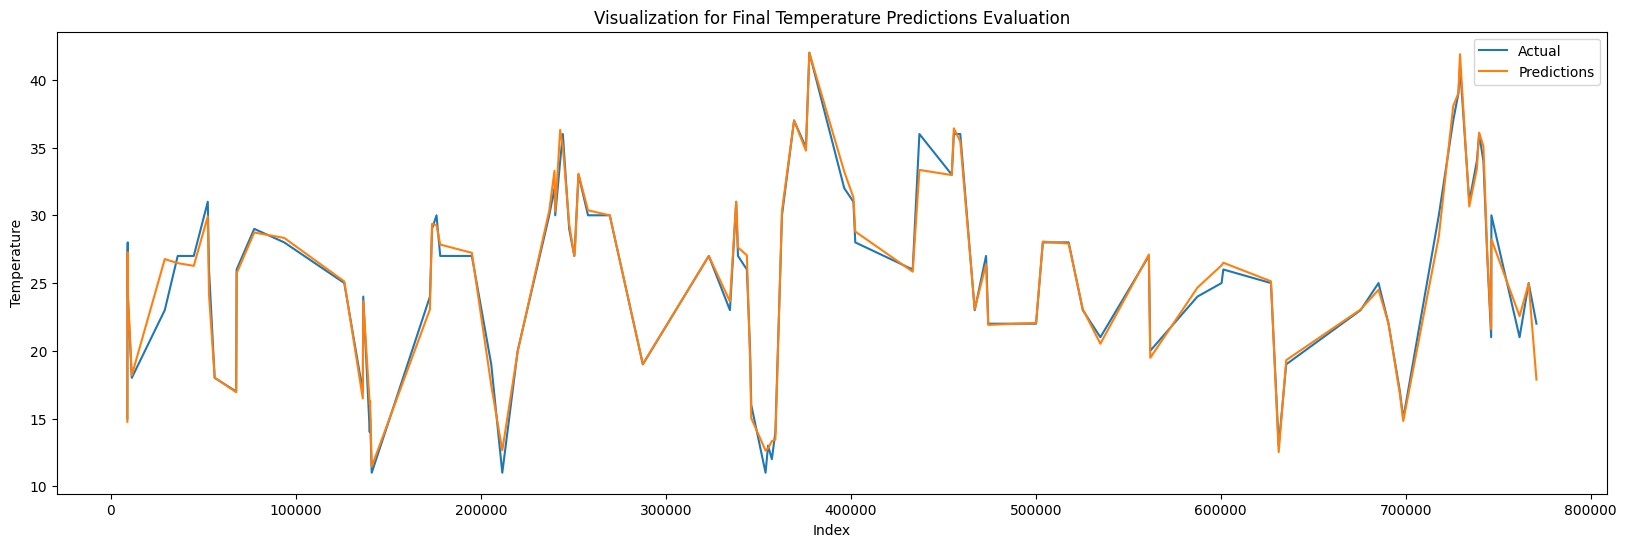

In [50]:
sample = finalTemperatureOutput.sample(n=100)
sample.sort_index(inplace=True)
plt.figure(figsize=(20,6))
plt.plot(sample.index, sample['actual'], label='Actual')
plt.plot(sample.index, sample['predictions'], label='Predictions')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Visualization for Final Temperature Predictions Evaluation')
plt.legend()
plt.show()

In [51]:
newPredictors = ["month", "hour", "latitude", "longitude", "temperature", "minTemperature", "maxTemperature", "pressure", "humidity", "visibility", "windSpeed", "windDirection", "windGust", "precipitation", "cloudCover"]
feelsLikeRFR = RandomForestRegressor()
feelsLikeRFR.fit(finalTrainDataset[newPredictors], finalTrainDataset["feelsLike"])
feelsLikePredictions = feelsLikeRFR.predict(finalTestDataset[newPredictors])

print("Feels Like MAE: " + str(mae(finalTestDataset["feelsLike"], feelsLikePredictions)))
print("Feels Like RMSE: " + str(rmse(finalTestDataset["feelsLike"], feelsLikePredictions)))

feelsLikeOutput = pd.concat([finalTestDataset["feelsLike"], pd.Series(feelsLikePredictions, index=finalTestDataset.index)], axis=1)
feelsLikeOutput.columns = ["actual", "predictions"]
feelsLikeOutput

Feels Like MAE: 0.5102475176937235
Feels Like RMSE: 0.7143423679622442


,actual,predictions
index,,
459055,36,35.50
766476,20,20.21
403452,30,30.22
100828,27,26.98
333343,26,26.16
...,...,...
295963,34,34.13
77381,19,18.80
680023,31,30.57


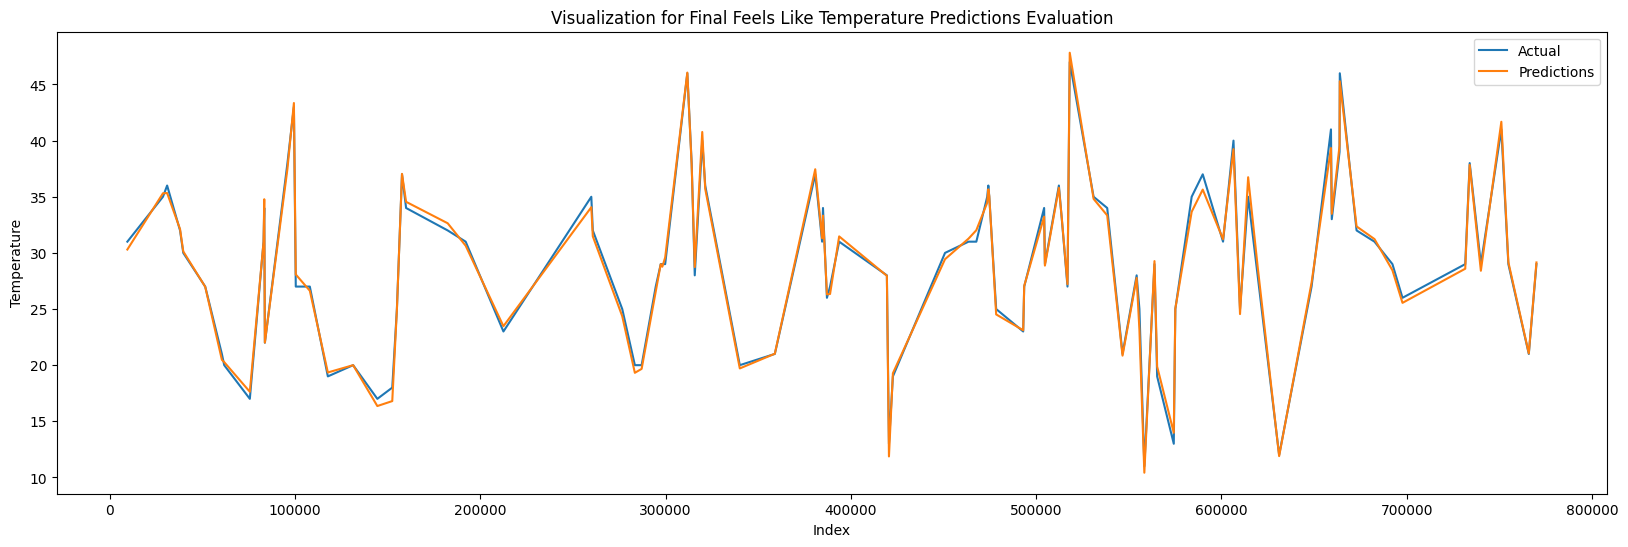

In [52]:
sample = feelsLikeOutput.sample(n=100)
sample.sort_index(inplace=True)
plt.figure(figsize=(20,6))
plt.plot(sample.index, sample['actual'], label='Actual')
plt.plot(sample.index, sample['predictions'], label='Predictions')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Visualization for Final Feels Like Temperature Predictions Evaluation')
plt.legend()
plt.show()

In [53]:
import pickle
pickle.dump (temperatureRFR, open('temperatureModel.pkl', 'wb'))

In [54]:
pickle.dump (feelsLikeRFR, open('feelsLikeModel.pkl', 'wb'))